In [25]:
import os
from glob import glob
import numpy as np
from scipy.io import wavfile
from scipy import signal
from matplotlib import pyplot as plt
from scipy import ndimage

In [28]:
# Directory containing your WAV files
directory = 'C:/Users/lense/Desktop/snares'

# Get a list of all WAV files in the directory
file_paths = glob(os.path.join(directory, '*.wav'))

# Number of files to process
num_files = 5  # Or however many you want to process

In [59]:
freq_responses = []
freqs = []
spectrum = []
# Loop through each file and process
for i, file_path in enumerate(file_paths[:num_files]):
    # Step 1: Read the audio file
    sample_rate, audio = wavfile.read(file_path)

    # If stereo, convert to mono by averaging the two channels
    if len(audio.shape) == 2:
        audio = np.mean(audio, axis=1)

    # Step 2: Calculate the frequency response using the Welch method
    frequencies, power_spectrum = signal.welch(audio, fs=sample_rate, nperseg=1024)
    freqs.append(frequencies)
    # Convert power spectrum to decibels
    power_spectrum_db = 10 * np.log10(power_spectrum)

    # Step 3: Smooth the frequency response using a Gaussian filter
    smoothed_spectrum = ndimage.gaussian_filter1d(power_spectrum_db, sigma=10)
    spectrum.append(smoothed_spectrum)

    file_name = os.path.basename(file_path)

    data = np.column_stack((frequencies, smoothed_spectrum))
    freq_responses.append((file_name, data))


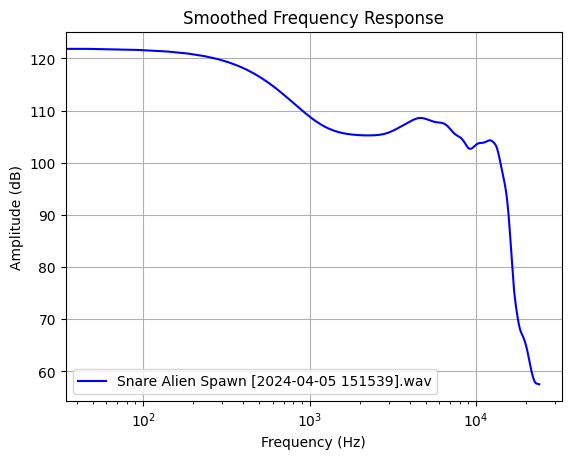

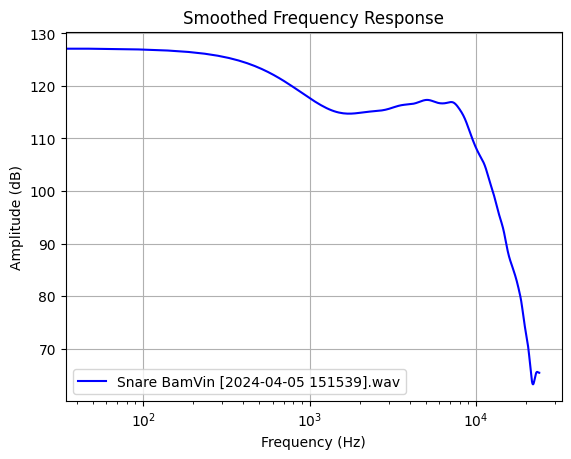

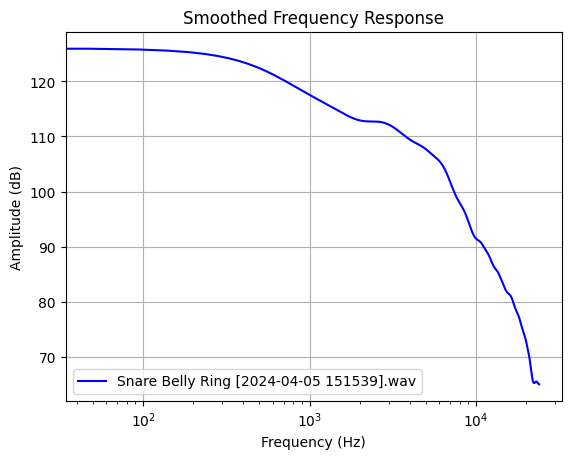

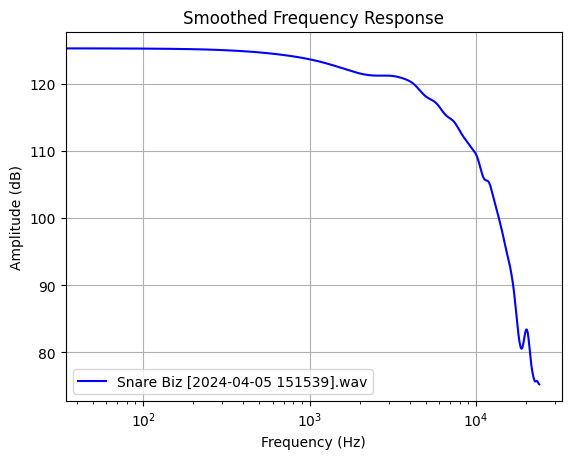

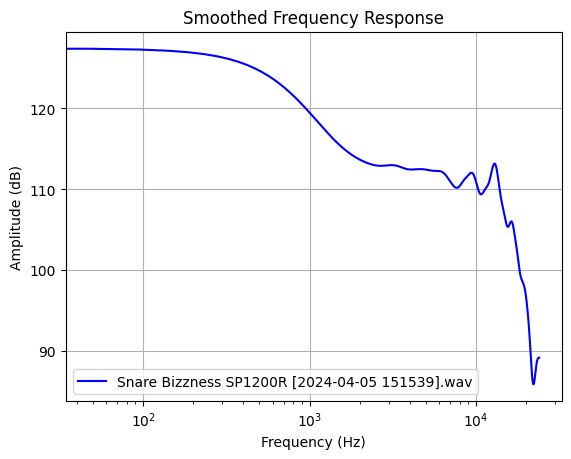

In [62]:
for file in freq_responses:
    x = file[1][:,0]
    y = file[1][:, 1]
    plt.plot(x, y, color='blue', label=file[0])
    plt.title('Smoothed Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.grid(True)
    plt.xscale('log')
    plt.legend()
    plt.show()

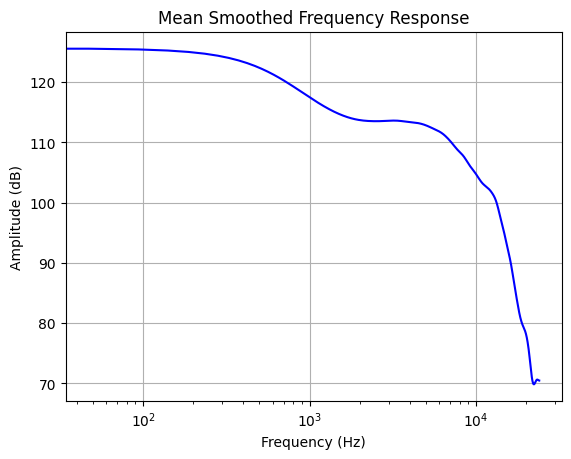

In [78]:
freq_means = np.mean(freqs, axis=0)
spec_means = np.mean(spectrum, axis=0)

plt.plot(freq_means, spec_means, color='blue')
plt.title('Mean Smoothed Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.xscale('log')
#plt.yscale('log')
plt.show()

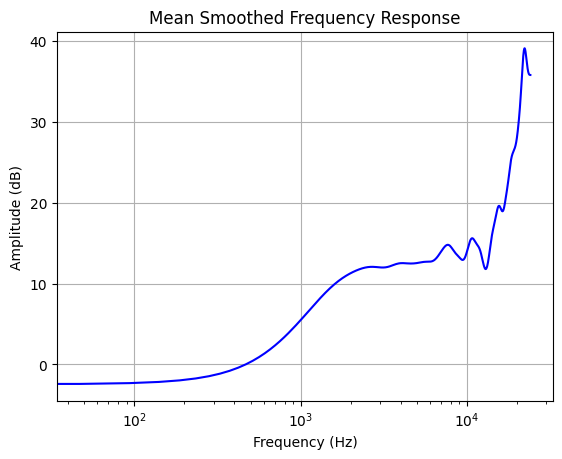

In [76]:
d_freqs = [np.subtract(mean, freq) for mean, freq in zip(freq_means, freqs)]
d_spectrum = [np.subtract(mean, spec) for mean, spec in zip(spec_means, spectrum)]

plt.plot(freq_means, d_spectrum[4], color='blue')
plt.title('Mean Smoothed Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.xscale('log')
plt.show()